In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

pd.options.display.float_format = '{:40,.2f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

In [2]:
#read in greenspace data

greenspace=pd.read_csv('Data/Access-to-green-space-LA-1r.csv', low_memory=False)

greenspace.info()
greenspace.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country code             371 non-null    object 
 1   Country name             371 non-null    object 
 2   Region code              371 non-null    object 
 3   Region name              371 non-null    object 
 4   LAD code                 371 non-null    object 
 5   LAD name                 371 non-null    object 
 6   Property type: Houses    371 non-null    int64  
 7   Property type: Houses.1  371 non-null    int64  
 8   Property type: Houses.2  371 non-null    int64  
 9   Property type: Houses.3  371 non-null    float64
 10  Property type: Houses.4  371 non-null    object 
 11  Property type: Houses.5  371 non-null    float64
 12  Property type: Flats     371 non-null    int64  
 13  Property type: Flats.1   371 non-null    int64  
 14  Property type: Flats.2   3

,Country code,Country name,Region code,Region name,LAD code,LAD name,Property type: Houses,Property type: Houses.1,Property type: Houses.2,Property type: Houses.3,...,Property type: Flats.2,Property type: Flats.3,Property type: Flats.4,Property type: Flats.5,Property type: Flats.6,Property type: Total,Property type: Total.1,Property type: Total.2,Property type: Total.3,Property type: Total.4
0,S92000003,Scotland,S15000001,Scotland,S12000033,Aberdeen City,53082,51390,14593876,0.97,...,2953183,9280,0.71,318.2,5.00,118428,97611,17547060,0.82,289.2
1,S92000003,Scotland,S15000001,Scotland,S12000034,Aberdeenshire,102121,96098,61829210,0.94,...,2469448,4736,0.72,521.4,2.60,119299,108432,64298658,0.91,637.7
2,E92000001,England,E12000008,South East,E07000223,Adur,21568,21269,5095973,0.99,...,265419,1027,0.60,258.4,3.90,28290,25323,5361392,0.90,240.5
3,E92000001,England,E12000002,North West,E07000026,Allerdale,41586,39191,14573753,0.94,...,800265,1900,0.73,421.2,2.20,47319,43352,15374018,0.92,374.1
4,E92000001,England,E12000004,East Midlands,E07000032,Amber Valley,53128,51014,16629607,0.96,...,573402,1402,0.67,409,2.30,57951,54219,17203008,0.94,328.2


In [3]:
#read in productivity data
productivity=pd.read_csv('Data/Nominal-GVA-per-filled-job.csv', low_memory=False)

productivity.sample(3, random_state=42)

,LAD Code,LAD Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
268,E08000021,Newcastle upon Tyne,"32,832.00","34,281.00","35,618.00","36,656.00","37,012.00","37,017.00","38,057.00","39,331.00","40,515.00","41,645.00","42,645.00","43,716.00","45,069.00","46,201.00","46,738.00"
250,E08000002,Bury,"33,087.00","34,735.00","36,429.00","37,766.00","37,915.00","37,429.00","37,575.00","38,058.00","38,577.00","39,276.00","39,365.00","39,759.00","40,336.00","41,286.00","41,646.00"
318,S12000005,Clackmannanshire,"33,155.00","34,384.00","35,833.00","37,306.00","37,516.00","36,877.00","37,174.00","38,172.00","39,650.00","41,340.00","42,866.00","44,007.00","45,389.00","46,555.00","47,298.00"


In [4]:
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LAD Code  372 non-null    object 
 1   LAD Name  372 non-null    object 
 2   2004      372 non-null    float64
 3   2005      372 non-null    float64
 4   2006      372 non-null    float64
 5   2007      372 non-null    float64
 6   2008      372 non-null    float64
 7   2009      372 non-null    float64
 8   2010      372 non-null    float64
 9   2011      372 non-null    float64
 10  2012      372 non-null    float64
 11  2013      372 non-null    float64
 12  2014      372 non-null    float64
 13  2015      372 non-null    float64
 14  2016      372 non-null    float64
 15  2017      372 non-null    float64
 16  2018      372 non-null    float64
dtypes: float64(15), object(2)
memory usage: 51.0+ KB


In [5]:
productivity = productivity[productivity['2018'].notna()]

In [6]:
# change floats to integers

productivity['2004'] = productivity['2004'].astype('int64')
productivity['2005'] = productivity['2005'].astype('int64')
productivity['2006'] = productivity['2006'].astype('int64')
productivity['2007'] = productivity['2007'].astype('int64')
productivity['2008'] = productivity['2008'].astype('int64')
productivity['2009'] = productivity['2009'].astype('int64')
productivity['2010'] = productivity['2010'].astype('int64')
productivity['2011'] = productivity['2011'].astype('int64')
productivity['2012'] = productivity['2012'].astype('int64')
productivity['2013'] = productivity['2013'].astype('int64')
productivity['2014'] = productivity['2014'].astype('int64')
productivity['2015'] = productivity['2015'].astype('int64')
productivity['2016'] = productivity['2016'].astype('int64')
productivity['2017'] = productivity['2017'].astype('int64')
productivity['2018'] = productivity['2018'].astype('int64')
productivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LAD Code  372 non-null    object
 1   LAD Name  372 non-null    object
 2   2004      372 non-null    int64 
 3   2005      372 non-null    int64 
 4   2006      372 non-null    int64 
 5   2007      372 non-null    int64 
 6   2008      372 non-null    int64 
 7   2009      372 non-null    int64 
 8   2010      372 non-null    int64 
 9   2011      372 non-null    int64 
 10  2012      372 non-null    int64 
 11  2013      372 non-null    int64 
 12  2014      372 non-null    int64 
 13  2015      372 non-null    int64 
 14  2016      372 non-null    int64 
 15  2017      372 non-null    int64 
 16  2018      372 non-null    int64 
dtypes: int64(15), object(2)
memory usage: 52.3+ KB


In [7]:
productivity.head()

,LAD Code,LAD Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,UK,United Kingdom less Extra-Regio,39437,41277,43217,45025,45871,45895,46759,47697,48879,50290,51415,52316,53788,55347,56387
1,E06000001,Hartlepool,28674,29698,31039,32627,34064,34922,36572,38018,38891,39251,39473,40628,42882,45181,46449
2,E06000002,Middlesbrough,27912,29160,30984,32565,33710,34139,35253,36120,36915,37797,38953,40406,42671,44708,46008
3,E06000003,Redcar and Cleveland,30805,31379,32141,33759,35192,36197,37423,38163,38410,38652,38792,38899,39226,39653,39933
4,E06000004,Stockton-on-Tees,42352,44419,46676,49076,50581,50823,51316,51232,51574,52429,53728,54563,55718,56329,56664


In [8]:
productivity = productivity.drop(productivity.index[0])
productivity.head()

,LAD Code,LAD Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,E06000001,Hartlepool,28674,29698,31039,32627,34064,34922,36572,38018,38891,39251,39473,40628,42882,45181,46449
2,E06000002,Middlesbrough,27912,29160,30984,32565,33710,34139,35253,36120,36915,37797,38953,40406,42671,44708,46008
3,E06000003,Redcar and Cleveland,30805,31379,32141,33759,35192,36197,37423,38163,38410,38652,38792,38899,39226,39653,39933
4,E06000004,Stockton-on-Tees,42352,44419,46676,49076,50581,50823,51316,51232,51574,52429,53728,54563,55718,56329,56664
5,E06000005,Darlington,39856,40572,40822,40312,39527,38898,39568,41355,43457,46587,48714,50465,51802,53510,54558


In [9]:
greenspace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country code             371 non-null    object 
 1   Country name             371 non-null    object 
 2   Region code              371 non-null    object 
 3   Region name              371 non-null    object 
 4   LAD code                 371 non-null    object 
 5   LAD name                 371 non-null    object 
 6   Property type: Houses    371 non-null    int64  
 7   Property type: Houses.1  371 non-null    int64  
 8   Property type: Houses.2  371 non-null    int64  
 9   Property type: Houses.3  371 non-null    float64
 10  Property type: Houses.4  371 non-null    object 
 11  Property type: Houses.5  371 non-null    float64
 12  Property type: Flats     371 non-null    int64  
 13  Property type: Flats.1   371 non-null    int64  
 14  Property type: Flats.2   3

In [10]:
#Drop columns of productivity before 2014

productivity.drop(['2004','2005','2006','2007','2008','2009','2010','2011','2012'], axis=1, inplace=True)

In [11]:
#Drop columns of greenspace for flats and houses

cols=[0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18]
greenspace.drop(greenspace.columns[cols], axis=1, inplace=True)


In [12]:
greenspace.sample(3, random_state=42)

,LAD code,LAD name,Property type: Total,Property type: Total.1,Property type: Total.2,Property type: Total.3,Property type: Total.4
327,W06000020,Torfaen,42343,39169,8557118,0.93,232.5
33,E07000067,Braintree,65953,59407,25951174,0.90,472.3
15,E07000027,Barrow-in-Furness,33837,31756,9818599,0.94,327.1


In [13]:
greenspace.rename(columns={'Property type: Total':'AddressCount','Property type: Total.1':'AddressWithOutdoorCount','Property type: Total.2':'OutdoorSpaceArea','Property type: Total.3':'PercentAddressOutdoor','Property type: Total.4':'SizeOutdoor'}, inplace = True)
greenspace.head()

,LAD code,LAD name,AddressCount,AddressWithOutdoorCount,OutdoorSpaceArea,PercentAddressOutdoor,SizeOutdoor
0,S12000033,Aberdeen City,118428,97611,17547060,0.82,289.2
1,S12000034,Aberdeenshire,119299,108432,64298658,0.91,637.7
2,E07000223,Adur,28290,25323,5361392,0.90,240.5
3,E07000026,Allerdale,47319,43352,15374018,0.92,374.1
4,E07000032,Amber Valley,57951,54219,17203008,0.94,328.2


In [14]:
#Join datasets using local authority code 

df=productivity.set_index('LAD Code').join(greenspace.set_index('LAD code'))

df.sample(6, random_state=42)

,LAD Name,2013,2014,2015,2016,2017,2018,LAD name,AddressCount,AddressWithOutdoorCount,OutdoorSpaceArea,PercentAddressOutdoor,SizeOutdoor
LAD Code,,,,,,,,,,,,,
S12000020,Moray,39275,39882,40442,42343,44389,45786,Moray,"45,848.00","41,717.00","19,906,720.00",0.91,513.6
E06000036,Bracknell Forest,72956,73101,74732,77386,80909,82759,Bracknell Forest,"50,967.00","45,613.00","12,479,177.00",0.90,309.8
E06000016,Leicester,39435,40258,41071,42939,45081,46728,Leicester,"140,317.00","119,944.00","17,514,801.00",0.86,166.4
E09000031,Waltham Forest,48112,49011,50180,51691,52909,53608,Waltham Forest,"107,313.00","92,264.00","8,568,346.00",0.86,128.7
E07000005,Chiltern,54127,54948,56511,60266,64790,68161,Chiltern,"40,329.00","36,526.00","21,860,905.00",0.91,653.4
E07000238,Wychavon,38563,38679,38983,40080,41625,42775,Wychavon,"58,288.00","53,381.00","27,300,861.00",0.92,547.9


In [15]:
#drop duplicate column

df.drop(['LAD name'], axis=1, inplace=True)

df.sample(3, random_state=42)

,LAD Name,2013,2014,2015,2016,2017,2018,AddressCount,AddressWithOutdoorCount,OutdoorSpaceArea,PercentAddressOutdoor,SizeOutdoor
LAD Code,,,,,,,,,,,,
S12000020,Moray,39275,39882,40442,42343,44389,45786,"45,848.00","41,717.00","19,906,720.00",0.91,513.6
E06000036,Bracknell Forest,72956,73101,74732,77386,80909,82759,"50,967.00","45,613.00","12,479,177.00",0.90,309.8
E06000016,Leicester,39435,40258,41071,42939,45081,46728,"140,317.00","119,944.00","17,514,801.00",0.86,166.4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, E06000001 to W06000024
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LAD Name                 371 non-null    object 
 1   2013                     371 non-null    int64  
 2   2014                     371 non-null    int64  
 3   2015                     371 non-null    int64  
 4   2016                     371 non-null    int64  
 5   2017                     371 non-null    int64  
 6   2018                     371 non-null    int64  
 7   AddressCount             369 non-null    float64
 8   AddressWithOutdoorCount  369 non-null    float64
 9   OutdoorSpaceArea         369 non-null    float64
 10  PercentAddressOutdoor    369 non-null    float64
 11  SizeOutdoor              369 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 47.7+ KB


In [17]:
# Change floats to integers

#df['2013'] = df['2013'].astype('int64')
#df['2014'] = df['2014'].astype('int64')
#df['2015'] = df['2015'].astype('int64')
#df['2016'] = df['2016'].astype('int64')
#df['2017'] = df['2017'].astype('int64')
#df['2018'] = df['2018'].astype('int64')


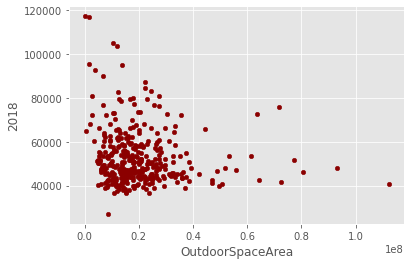

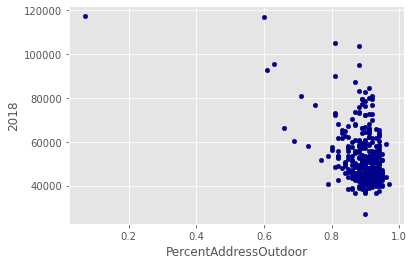

In [18]:
Series1 = df.plot.scatter(x='OutdoorSpaceArea', y='2018', c='DarkRed')
Series2 = df.plot.scatter(x='PercentAddressOutdoor', y='2018', c='DarkBlue')

# Access to Parks and Fields 

In [19]:
parks=pd.read_csv('Data/Access-to-parks-LA.csv', low_memory=False)
parks.head()

,Country code,Country name,Region code,Region name,LAD code,LAD name,"Average distance to nearest Park, Public Garden, or Playing Field (m)","Average size of nearest Park, Public Garden, or Playing Field (m2)","Average number of Parks, Public Gardens, or Playing Fields within 1,000 m radius","Average combined size of Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)"
0,E92000001,England,E12000001,North East,E06000001,Hartlepool,484.69,"63,282.85",2.90,"162,026.68"
1,E92000001,England,E12000001,North East,E06000002,Middlesbrough,403.28,"73,891.43",3.84,"288,396.14"
2,E92000001,England,E12000001,North East,E06000003,Redcar and Cleveland,308.17,"58,248.12",4.09,"196,727.94"
3,E92000001,England,E12000001,North East,E06000004,Stockton-on-Tees,453.80,"123,374.91",3.33,"454,970.90"
4,E92000001,England,E12000001,North East,E06000005,Darlington,419.16,"48,845.83",3.44,"180,449.80"


In [20]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 10 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country code                                                                                   371 non-null    object 
 1   Country name                                                                                   371 non-null    object 
 2   Region code                                                                                    371 non-null    object 
 3   Region name                                                                                    371 non-null    object 
 4   LAD code                                                                                       371 non-null    object 
 5   LAD name              

In [21]:
#Join datasets productivity and parks

df1=parks.set_index('LAD name').join(df.set_index('LAD Name'))
df1.set_index('LAD code')

df1.sample(6, random_state=42)

,Country code,Country name,Region code,Region name,LAD code,"Average distance to nearest Park, Public Garden, or Playing Field (m)","Average size of nearest Park, Public Garden, or Playing Field (m2)","Average number of Parks, Public Gardens, or Playing Fields within 1,000 m radius","Average combined size of Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)",2013,2014,2015,2016,2017,2018,AddressCount,AddressWithOutdoorCount,OutdoorSpaceArea,PercentAddressOutdoor,SizeOutdoor
LAD name,,,,,,,,,,,,,,,,,,,,
Moray,S92000003,Scotland,S15000001,Scotland,S12000020,955.90,"31,024.89",2.90,"96,306.76",39275,39882,40442,42343,44389,45786,"45,848.00","41,717.00","19,906,720.00",0.91,513.6
Bracknell Forest,E92000001,England,E12000008,South East,E06000036,331.78,"194,161.65",4.76,"449,507.38",72956,73101,74732,77386,80909,82759,"50,967.00","45,613.00","12,479,177.00",0.90,309.8
Leicester,E92000001,England,E12000004,East Midlands,E06000016,309.97,"97,227.23",5.51,"427,977.55",39435,40258,41071,42939,45081,46728,"140,317.00","119,944.00","17,514,801.00",0.86,166.4
Waltham Forest,E92000001,England,E12000007,London,E09000031,323.17,"103,539.58",5.93,"422,261.49",48112,49011,50180,51691,52909,53608,"107,313.00","92,264.00","8,568,346.00",0.86,128.7
Chiltern,E92000001,England,E12000008,South East,E07000005,404.33,"39,442.96",3.35,"129,094.45",54127,54948,56511,60266,64790,68161,"40,329.00","36,526.00","21,860,905.00",0.91,653.4
Wychavon,E92000001,England,E12000005,West Midlands,E07000238,492.21,"27,773.84",3.57,"104,889.25",38563,38679,38983,40080,41625,42775,"58,288.00","53,381.00","27,300,861.00",0.92,547.9


In [22]:
df1.drop(["AddressCount"], axis=1, inplace=True)
df1.drop(["AddressWithOutdoorCount"], axis=1, inplace=True)
df1.drop(["OutdoorSpaceArea"], axis=1, inplace=True)
df1.drop(["PercentAddressOutdoor"], axis=1, inplace=True)
df1.drop(["SizeOutdoor"], axis=1, inplace=True)

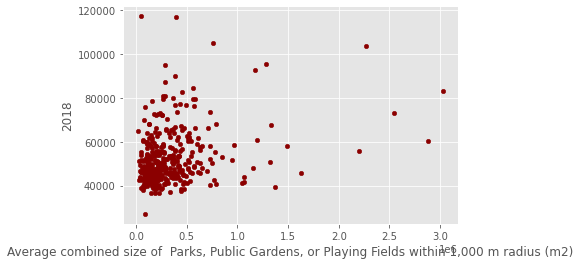

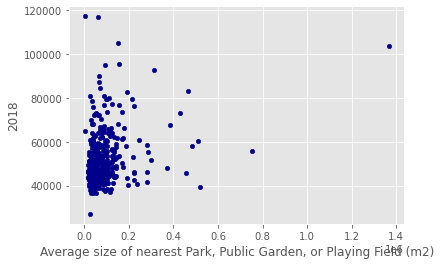

In [23]:
Series1 = df1.plot.scatter(x='Average combined size of  Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)', y='2018', c='DarkRed')
Series2 = df1.plot.scatter(x='Average size of nearest Park, Public Garden, or Playing Field (m2)', y='2018', c='DarkBlue')

# Wellbeing Indices

In [24]:
wellbeing = pd.read_csv('Data/Wellbeing-Indices-v2.csv', low_memory=False)
#set area code as index
wellbeing.set_index('Area Codes')
wellbeing = wellbeing.rename(columns={'Area Codes':'LAD code'})
wellbeing.head()

,LAD code,Area Names,Geographical Designation,Worthwhile: 2011/12,Worthwhile: 2012/13,Worthwhile: 2013/14,Worthwhile: 2014/15,Worthwhile: 2015/16,Worthwhile: 2016/17,Worthwhile: 2017/18,...,Happy: 2019/20,Life Satisfaction: 2011/12,Life Satisfaction: 2012/13,Life Satisfaction: 2013/14,Life Satisfaction: 2014/15,Life Satisfaction: 2015/16,Life Satisfaction: 2016/17,Life Satisfaction: 2017/18,Life Satisfaction: 2018/19,Life Satisfaction: 2019/20
0,E06000047,County Durham,Local Authority,7.68,7.65,7.74,7.76,7.80,7.88,8.01,...,7.36,7.52,7.30,7.49,7.69,7.62,7.65,7.80,7.83,7.58
1,E06000005,Darlington,Local Authority,7.68,7.66,7.83,7.81,7.91,7.77,7.87,...,7.60,7.50,7.46,7.59,7.68,7.62,7.61,7.74,7.73,7.71
2,E06000001,Hartlepool,Local Authority,7.53,7.59,7.71,7.85,7.73,7.70,7.81,...,7.31,7.48,7.32,7.48,7.66,7.56,7.56,7.49,7.56,7.63
3,E06000002,Middlesbrough,Local Authority,7.61,7.70,7.64,7.73,7.89,7.70,7.84,...,7.24,7.41,7.39,7.41,7.53,7.71,7.64,7.63,7.61,7.46
4,E06000057,Northumberland,Local Authority,7.74,7.79,7.80,7.77,7.80,7.67,7.83,...,7.39,7.49,7.54,7.59,7.63,7.76,7.51,7.63,7.58,7.60


In [25]:
wellbeing.shape

(380, 30)

In [26]:
# the location columns between df1 and wellbeing do not match, therefore rows that do not match need to be dropped before graph plotted

innerjoin_wellbeing = pd.merge(df1, wellbeing)
innerjoin_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 44 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country code                                                                                   362 non-null    object 
 1   Country name                                                                                   362 non-null    object 
 2   Region code                                                                                    362 non-null    object 
 3   Region name                                                                                    362 non-null    object 
 4   LAD code                                                                                       362 non-null    object 
 5   Average distance to ne

In [27]:
innerjoin_wellbeing.describe()

,"Average distance to nearest Park, Public Garden, or Playing Field (m)","Average size of nearest Park, Public Garden, or Playing Field (m2)","Average number of Parks, Public Gardens, or Playing Fields within 1,000 m radius","Average combined size of Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)",2013,2014,2015,2016,2017,2018,...,Happy: 2019/20,Life Satisfaction: 2011/12,Life Satisfaction: 2012/13,Life Satisfaction: 2013/14,Life Satisfaction: 2014/15,Life Satisfaction: 2015/16,Life Satisfaction: 2016/17,Life Satisfaction: 2017/18,Life Satisfaction: 2018/19,Life Satisfaction: 2019/20
count,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,...,359.00,360.00,360.00,360.00,360.00,360.00,360.00,359.00,360.00,359.00
mean,439.34,"91,304.53",4.11,"348,227.28","47,291.53","48,301.33","49,095.34","50,397.72","51,813.03","52,756.09",...,7.51,7.46,7.49,7.55,7.65,7.68,7.71,7.73,7.75,7.70
std,252.77,"107,260.56",1.60,"367,908.33","11,523.73","11,772.65","11,907.72","12,145.73","12,509.94","12,786.14",...,0.22,0.22,0.20,0.21,0.21,0.21,0.19,0.20,0.20,0.20
min,193.28,"1,954.85",1.48,"20,857.00","26,897.00","27,825.00","27,879.00","27,456.00","27,049.00","27,060.00",...,6.85,6.74,6.79,6.75,6.95,6.86,7.12,7.11,7.20,7.03
25%,320.98,"42,240.27",3.08,"151,343.91","39,365.25","40,404.00","40,931.75","42,349.00","43,523.75","44,220.50",...,7.34,7.30,7.35,7.41,7.52,7.55,7.60,7.60,7.61,7.57
50%,381.31,"65,211.54",3.80,"244,928.74","44,362.00","45,286.50","45,701.50","46,976.50","48,524.50","49,322.50",...,7.50,7.46,7.48,7.54,7.65,7.68,7.70,7.73,7.73,7.69
75%,468.04,"100,182.97",4.82,"421,110.58","52,216.25","53,596.50","54,165.50","55,523.25","57,036.00","57,886.50",...,7.63,7.60,7.63,7.68,7.77,7.81,7.83,7.85,7.88,7.81
max,"2,525.04","1,367,821.11",12.71,"3,023,029.00","121,386.00","119,892.00","117,139.00","116,026.00","116,321.00","117,326.00",...,8.35,8.16,8.12,8.23,8.39,8.31,8.45,8.59,8.45,8.39


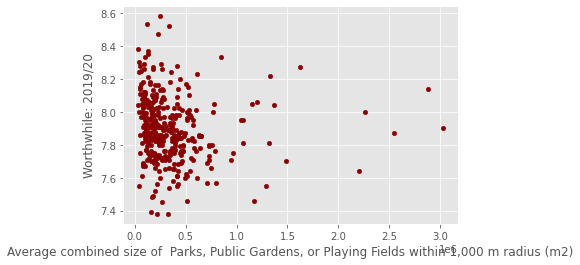

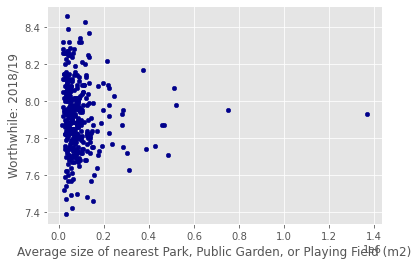

In [28]:
Series1 = innerjoin_wellbeing.plot.scatter(x='Average combined size of  Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)', y='Worthwhile: 2019/20', c='DarkRed')
Series2 = innerjoin_wellbeing.plot.scatter(x='Average size of nearest Park, Public Garden, or Playing Field (m2)', y='Worthwhile: 2018/19', c='DarkBlue')

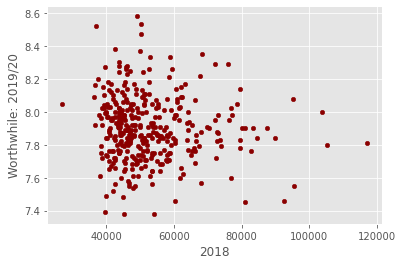

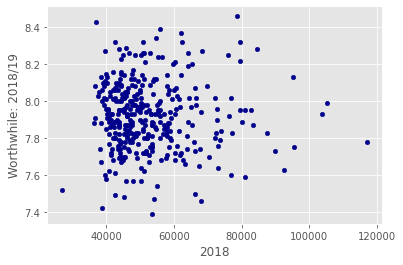

In [29]:
Series1 = innerjoin_wellbeing.plot.scatter(x='2018', y='Worthwhile: 2019/20', c='DarkRed')
Series2 = innerjoin_wellbeing.plot.scatter(x='2018', y='Worthwhile: 2018/19', c='DarkBlue')

In [30]:
# try some transformations of data - box cox or tukey transformation?
# Consider if there are clusters north and south? or south east and rest of country
# plot only london and south east?
# 

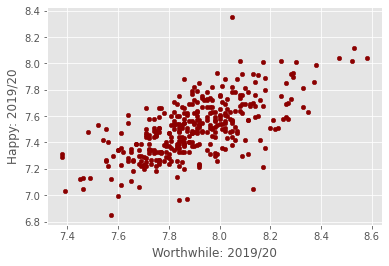

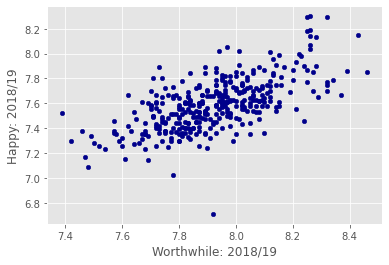

In [31]:
Series1 = innerjoin_wellbeing.plot.scatter(x='Worthwhile: 2019/20', y='Happy: 2019/20', c='DarkRed')
Series2 = innerjoin_wellbeing.plot.scatter(x='Worthwhile: 2018/19', y='Happy: 2018/19', c='DarkBlue')

In [32]:
innerjoin_wellbeing['Happiness_Worthwhile_Index']=innerjoin_wellbeing['Happy: 2018/19']/innerjoin_wellbeing['Worthwhile: 2018/19']

In [33]:
#Read in LA shapefile

LAs = gpd.read_file("Data/Local_Authority_Districts__December_2019__Boundaries_UK_BFE.shp")
print(LAs.crs)

epsg:27700


In [34]:
#subset dataframe for south east and london

wellbeingLandSE = innerjoin_wellbeing[innerjoin_wellbeing['Region name'].isin(['South East','London'])]
wellbeingLandSE.info()

#north_south = {'North East':'North','North West,Yorkshire and The Humber':'North','East Midlands':'Midlands','West Midlands':'Midlands','South West':'South','East of England':'East','South East':'South East','London':'London','Scotland':'North','Wales':'Wales'}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 32 to 311
Data columns (total 45 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country code                                                                                   100 non-null    object 
 1   Country name                                                                                   100 non-null    object 
 2   Region code                                                                                    100 non-null    object 
 3   Region name                                                                                    100 non-null    object 
 4   LAD code                                                                                       100 non-null    object 
 5   Average distance to n

<AxesSubplot:>

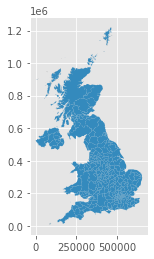

In [35]:
LAs.plot()

In [36]:
LAs.head()

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27,54.68,"98,346,671.72","66,121.47","POLYGON ((447213.899 537036.104, 447228.798 53..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21,54.54,"54,553,587.14","41,055.81","POLYGON ((448489.897 522071.798, 448592.597 52..."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.01,54.57,"253,785,361.26","105,292.14","POLYGON ((455525.931 528406.654, 455724.632 52..."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.31,54.56,"209,730,808.96","108,085.26","POLYGON ((444157.002 527956.304, 444165.898 52..."
4,5,E06000005,Darlington,None,428029,515648,-1.57,54.54,"197,475,688.99","107,206.40","POLYGON ((423496.602 524724.299, 423497.204 52..."


In [37]:
#creating the geodataframe
gdf=innerjoin_wellbeing.set_index('LAD code').join(LAs.set_index('LAD19CD'))
gdfwellbeing = gpd.GeoDataFrame(gdf, crs = "EPSG:27700")

<AxesSubplot:>

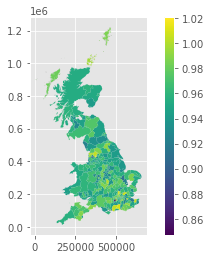

In [38]:
fig, ax = plt.subplots(1,1)

gdfwellbeing.plot(column = 'Happiness_Worthwhile_Index',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

<AxesSubplot:>

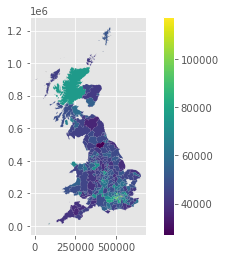

In [39]:
fig, ax = plt.subplots(1,1)

gdfwellbeing.plot(column = '2018',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

<AxesSubplot:>

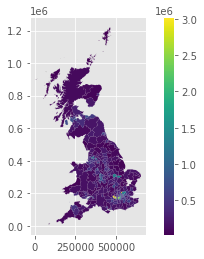

In [40]:
fig, ax = plt.subplots(1,1)

gdfwellbeing.plot(column = 'Average combined size of  Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

In [41]:
#gdfwellbeing['Happiness_Worthwhile_Normalised']=(gdfwellbeing['Happiness_Worthwhile_Index']-gdfwellbeing['Happiness_Worthwhile_Index'].min)/(gdfwellbeing['Happiness_Worthwhile_Index'].max-gdfwellbeing['Happiness_Worthwhile_Index'].min)

In [42]:
#plot london and south east only

gdfwellbeingLandSE = gdfwellbeing[gdfwellbeing['Region name'].isin(['South East','London', 'East of England'])]
gdfwellbeingLandSE.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 143 entries, E06000031 to E09000033
Data columns (total 54 columns):
 #   Column                                                                                         Non-Null Count  Dtype   
---  ------                                                                                         --------------  -----   
 0   Country code                                                                                   143 non-null    object  
 1   Country name                                                                                   143 non-null    object  
 2   Region code                                                                                    143 non-null    object  
 3   Region name                                                                                    143 non-null    object  
 4   Average distance to nearest Park, Public Garden, or Playing Field (m)                          143 non-null    float64 
 5 

<AxesSubplot:>

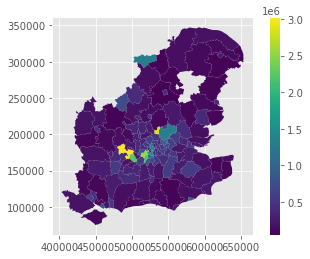

In [43]:
fig, ax = plt.subplots(1,1)

gdfwellbeingLandSE.plot(column = 'Average combined size of  Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

<AxesSubplot:>

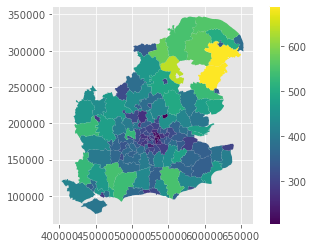

In [44]:
fig, ax = plt.subplots(1,1)

gdfwellbeingLandSE.plot(column = 'Average distance to nearest Park, Public Garden, or Playing Field (m)',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

<AxesSubplot:>

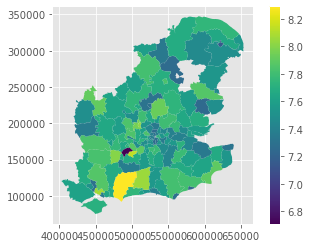

In [45]:
fig, ax = plt.subplots(1,1)

gdfwellbeingLandSE.plot(column = 'Happy: 2018/19',
        ax=ax, 
        figsize=(60, 60),
        legend=True)

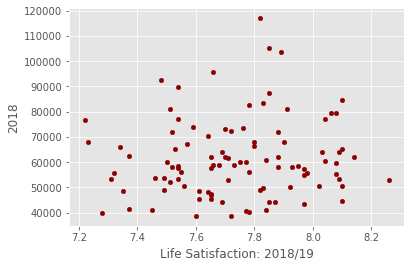

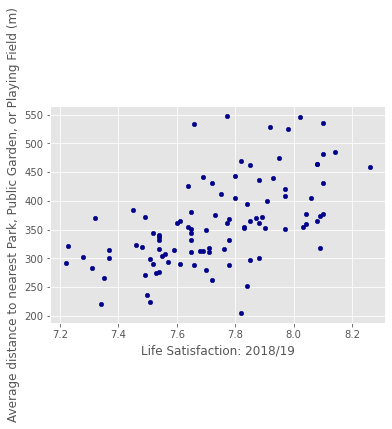

In [46]:
Series1 = wellbeingLandSE.plot.scatter(x='Life Satisfaction: 2018/19', y='2018', c='DarkRed')
Series2 = wellbeingLandSE.plot.scatter(x='Life Satisfaction: 2018/19', y='Average distance to nearest Park, Public Garden, or Playing Field (m)', c='DarkBlue')

In [47]:
wellbeingLandSE=wellbeingLandSE[~wellbeingLandSE.isin([np.nan, np.inf, -np.inf]).any(1)]

print(len(wellbeingLandSE) - wellbeingLandSE.count())

Country code                                                                                     0
Country name                                                                                     0
Region code                                                                                      0
Region name                                                                                      0
LAD code                                                                                         0
Average distance to nearest Park, Public Garden, or Playing Field (m)                            0
Average size of nearest Park, Public Garden, or Playing Field (m2)                               0
Average number of  Parks, Public Gardens, or Playing Fields within 1,000 m radius                0
Average combined size of  Parks, Public Gardens, or Playing Fields within 1,000 m radius (m2)    0
2013                                                                                             0
2014      

In [48]:
wellbeingLandSE['Average Life Satisfaction'] = wellbeingLandSE[['Life Satisfaction: 2011/12','Life Satisfaction: 2012/13','Life Satisfaction: 2013/14','Life Satisfaction: 2014/15','Life Satisfaction: 2015/16',
        'Life Satisfaction: 2016/17','Life Satisfaction: 2017/18','Life Satisfaction: 2018/19','Life Satisfaction: 2019/20' ]].mean(axis=1)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


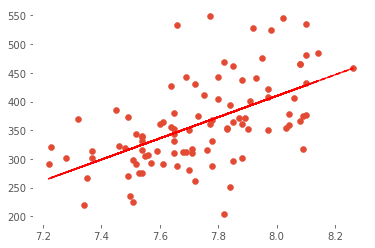

Text(0.5, 0, 'Life Satisfaction 2018')

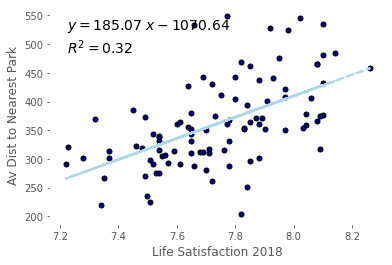

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')



x = wellbeingLandSE['Life Satisfaction: 2018/19']
y = wellbeingLandSE['Average distance to nearest Park, Public Garden, or Playing Field (m)']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Av Dist to Nearest Park')
ax.set_xlabel('Life Satisfaction 2018')

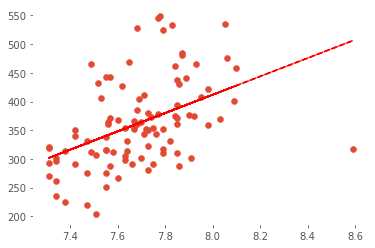

Text(0.5, 0, 'Life Satisfaction 2017')

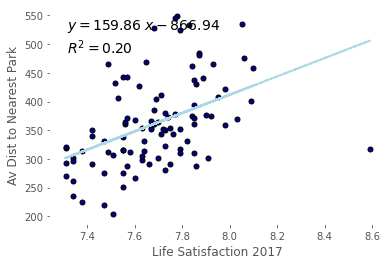

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')



x = wellbeingLandSE['Life Satisfaction: 2017/18']
y = wellbeingLandSE['Average distance to nearest Park, Public Garden, or Playing Field (m)']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Av Dist to Nearest Park')
ax.set_xlabel('Life Satisfaction 2017')

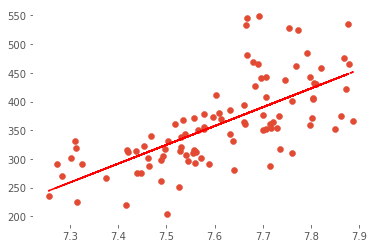

Text(0.5, 0, 'Average Life Satisfaction')

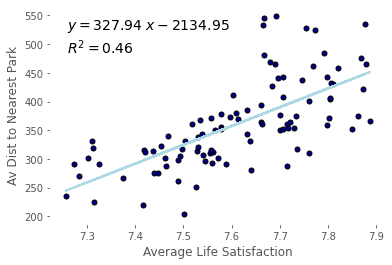

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')



x = wellbeingLandSE['Average Life Satisfaction']
y = wellbeingLandSE['Average distance to nearest Park, Public Garden, or Playing Field (m)']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Av Dist to Nearest Park')
ax.set_xlabel('Average Life Satisfaction')

In [52]:
# try a transformation and plot histograms!

In [54]:
wellbeingLandSE['Y Fitted Line'] = (wellbeingLandSE['Average Life Satisfaction']*327.94-2134.95)
wellbeingLandSE['Residuals'] = abs(wellbeingLandSE['Y Fitted Line']-wellbeingLandSE['Average distance to nearest Park, Public Garden, or Playing Field (m)'])

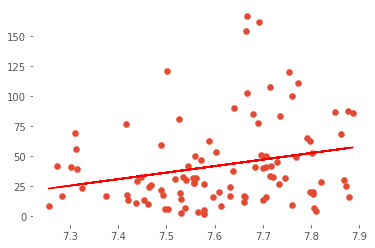

Text(0.5, 0, 'Average Life Satisfaction')

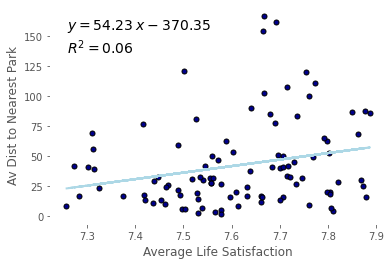

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')



x = wellbeingLandSE['Average Life Satisfaction']
y = wellbeingLandSE['Residuals']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Av Dist to Nearest Park')
ax.set_xlabel('Average Life Satisfaction')